# Lab | Data Aggregation and Filtering

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by first performing data cleaning, formatting, and structuring.

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

2. Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [1]:
import pandas as pd

In [2]:
from functions import *

In [3]:
# We read the csv file into a df:
marketing_customer = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv")
display(marketing_customer.head())

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [4]:
# We clean the dataset using the imported clean_dataframe function from our functions.py file
marketing_customer = clean_dataframe(marketing_customer)

In [5]:
# Some more cleaning, as the customer_lifetime_value was still considered as object type. 
marketing_customer=marketing_customer.astype({'customer_lifetime_value': 'float64'})

In [6]:
marketing_customer.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,nan,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [7]:
# We create the new dataset filtering only those records with a higher claim amount of 1000 and who have responded with "Yes"

df1 = marketing_customer[(marketing_customer["total_claim_amount"] >1000) & (marketing_customer["response"] == "Yes")]
display(df1.head())
display(df1.describe().T)
df1.response.unique()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
189,OK31456,California,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,51643,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Agent,1358.400000,Luxury,Medsize,NaN
236,YJ16163,Oregon,11009.130490,Yes,Premium,Bachelor,1/24/11,Employed,F,51643,...,0.0,1,Special Auto,Special L3,Offer2,Agent,1358.400000,Luxury,Medsize,A
419,GW43195,Oregon,25807.063000,Yes,Extended,College,2/13/11,Employed,F,71210,...,1.0,2,Personal Auto,Personal L2,Offer1,Branch,1027.200000,Luxury,Small,A
442,IP94270,Arizona,13736.132500,Yes,Premium,Master,2/13/11,Disabled,F,16181,...,0.0,8,Personal Auto,Personal L2,Offer1,Web,1261.319869,SUV,Medsize,A
587,FJ28407,California,5619.689084,Yes,Premium,High School or Below,1/26/11,Unemployed,M,0,...,0.0,1,Personal Auto,Personal L1,Offer2,Web,1027.000029,SUV,Medsize,A


,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,67.0,11502.854777,6370.018320,3508.569533,7840.165778,10179.71704,13736.1325,25807.063
income,67.0,36568.671642,22786.320061,0.000000,16181.000000,46503.00000,55687.0000,71210.000
monthly_premium_auto,67.0,213.268657,56.452603,98.000000,181.000000,214.00000,271.0000,283.000
months_since_last_claim,64.0,17.000000,8.417668,4.000000,8.000000,19.00000,22.0000,33.000
months_since_policy_inception,67.0,54.492537,31.895365,5.000000,24.000000,43.00000,89.0000,96.000
number_of_policies,67.0,2.268657,2.489871,1.000000,1.000000,1.00000,2.0000,8.000
total_claim_amount,67.0,1176.368262,138.315227,1008.000000,1027.200000,1176.27880,1300.8000,1358.400


array(['Yes'], dtype=object)

In [8]:
###Using the original Dataframe, analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign. Write your conclusions.
filtered_response = marketing_customer[(marketing_customer["response"] == "Yes")]
df2 = round(filtered_response.groupby(["policy_type","gender"]).agg({'total_claim_amount': 'mean'}),2).reset_index()
df2

,policy_type,gender,total_claim_amount
0,Corporate Auto,F,433.74
1,Corporate Auto,M,408.58
2,Personal Auto,F,452.97
3,Personal Auto,M,457.01
4,Special Auto,F,453.28
5,Special Auto,M,429.53


In [9]:
# Conclusions:

# Seems to be that Females have a higher total claim amount for the corporate auto and special auto types. The total amount is about 5-6 % higher in both types
# For Personal Auto type seems as Males had a slightly higher total claim amount, 1,1% higher to be more precise.

In [10]:
# Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

top_state = marketing_customer.groupby(["state"]).agg({"customer":"count"}).sort_values(by="customer",ascending = False).reset_index()
top_state

,state,customer
0,California,3552
1,Oregon,2909
2,Arizona,1937
3,Nevada,993
4,Washington,888


In [11]:
# Seems as if all states had more than 500 customers with policies, as the min val of policies is 1. The calculation is based on the count of customer per state

In [12]:
# Find the maximum, minimum, and median customer lifetime value by education level and gender. Write your conclusions.

In [13]:
education_gender = round(marketing_customer.groupby(["education","gender"]).agg({"customer_lifetime_value":["max","min","median"]}),2).reset_index()
education_gender

education gender customer_lifetime_value                  
                                                   max      min   median
0              Bachelor      F                73225.96  1904.00  5640.51
1              Bachelor      M                67907.27  1898.01  5548.03
2               College      F                61850.19  1898.68  5623.61
3               College      M                61134.68  1918.12  6005.85
4                Doctor      F                44856.11  2395.57  5332.46
5                Doctor      M                32677.34  2267.60  5577.67
6  High School or Below      F                55277.45  2144.92  6039.55
7  High School or Below      M                83325.38  1940.98  6286.73
8                Master      F                51016.07  2417.78  5729.86
9                Master      M                50568.26  2272.31  5579.10

Analysis

"High School or Below" education level has the highest maximum CLV for both genders, while "Doctor" level education seems to have the lowest combined median for M and F.

When it comes to genders we have to say that there is not a clear trend specificating which gender has higher or lower CLV. 

F have lower CLV for Education levels Doctor,college and High school and M have a lower CLV on Master and Bachelor level education.

The company should aim to structure marketing or customer retention strategies based on the observed patterns. For instance, if individuals with a "High School or Below" education level tend to have higher CLV, a business might focus more on attracting and retaining customers with that level of education.



## Bonus

5. The marketing team wants to analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.

6.  Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

*Hint:*
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [14]:
marketing_customer.columns


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

In [15]:
import datetime

In [16]:
# We convert the effective_to_date column to datetime format, in order to be able to extract the month for analysis
marketing_customer['effective_to_date'] = pd.to_datetime(marketing_customer['effective_to_date'], errors='coerce')
marketing_customer['effective_to_date_month']=marketing_customer['effective_to_date'].dt.month
print(marketing_customer.effective_to_date.dtypes)
display(marketing_customer)

datetime64[ns]


C:\Users\e.sansebastian\AppData\Local\Temp\ipykernel_592\3062184149.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing_customer['effective_to_date'] = pd.to_datetime(marketing_customer['effective_to_date'], errors='coerce')


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury,Medsize,NaN,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [17]:
# analyze the number of policies sold by state and month. Present the data in a table where the months are arranged as columns and the states are arranged as rows.
#education_gender = round(marketing_customer.groupby(["education","gender"]).agg({"customer_lifetime_value":["max","min","median"]}),2).reset_index()
    
state_month = marketing_customer.groupby(["state","effective_to_date_month"]).agg({"number_of_policies":"sum"}).reset_index()
state_month_wide = pd.pivot(state_month, index="state",columns=["effective_to_date_month"],values="number_of_policies").reset_index()
state_month_wide.rename(columns={'effective_to_date_month':"month"})
display(state_month_wide)


effective_to_date_month,state,1,2
0,Arizona,3052,2864
1,California,5673,4929
2,Nevada,1493,1278
3,Oregon,4697,3969
4,Washington,1358,1225


In [18]:
#Display a new DataFrame that contains the number of policies sold by month, by state, for the top 3 states with the highest number of policies sold.

states_month = marketing_customer.groupby(["state","effective_to_date_month"]).agg({"number_of_policies":"sum"}).sort_values(by="number_of_policies",ascending = False).reset_index()
top3_states = states_month.head(3)
top3_states

,state,effective_to_date_month,number_of_policies
0,California,1,5673
1,California,2,4929
2,Oregon,1,4697


In [19]:
# The marketing team wants to analyze the effect of different marketing channels on the customer response rate. melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.
channel_rate = marketing_customer.groupby('sales_channel')['response'].value_counts().reset_index()
channel_rate_yes = channel_rate[channel_rate["response"]=="Yes"]
display(channel_rate_yes)
dataset=channel_rate_yes.pivot(index='response',columns='sales_channel').reset_index()
display(dataset)

,sales_channel,response,count
1,Agent,Yes,742
3,Branch,Yes,326
5,Call Center,Yes,221
7,Web,Yes,177


response count                        
sales_channel          Agent Branch Call Center  Web
0                  Yes   742    326         221  177

# Lab | Customer Analysis Round 3


In [20]:
marketing_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10279 non-null  object        
 2   customer_lifetime_value        10910 non-null  float64       
 3   response                       10279 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective_to_date              10910 non-null  datetime64[ns]
 7   employmentstatus               10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location_code                  10910 non-null  object        
 11  marital_status 

In [21]:
round(marketing_customer.describe(),2)

,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies,total_claim_amount,effective_to_date_month
count,10910.00,10910,10910.00,10910.00,10277.00,10910.00,10910.00,10910.00,10910.00
mean,8018.24,2011-01-29 22:50:02.749771008,37536.28,93.20,15.15,48.09,2.98,434.89,1.47
min,1898.01,2011-01-01 00:00:00,0.00,61.00,0.00,0.00,1.00,0.10,1.00
25%,4014.45,2011-01-16 00:00:00,0.00,68.00,6.00,24.00,1.00,271.08,1.00
50%,5771.15,2011-01-30 00:00:00,33813.50,83.00,14.00,48.00,2.00,382.56,1.00
75%,8992.78,2011-02-14 00:00:00,62250.75,109.00,23.00,71.00,4.00,547.20,2.00
max,83325.38,2011-02-28 00:00:00,99981.00,298.00,35.00,99.00,9.00,2893.24,2.00
std,6885.08,NaN,30359.20,34.44,10.08,27.94,2.40,292.18,0.50


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# The line down below is needed to prevent matplotlib to open the graph in a seaparate popup window. 
%matplotlib inline

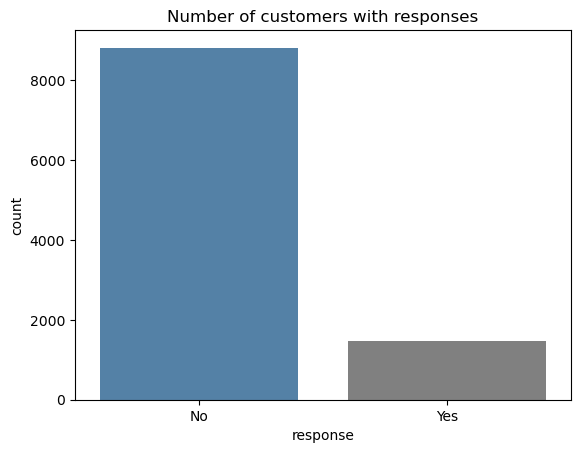

In [23]:
#Show a plot of the total number of responses.

fig, ax = plt.subplots()
sns.countplot(data=marketing_customer, x="response",palette=['steelblue', 'grey'], ax = ax)
ax.set_xlabel("response")
ax.set_ylabel("count")
ax.set_title("Number of customers with responses")
plt.show()

In [24]:
#Show a plot of the response rate by the sales channel.

rate_channel = marketing_customer.groupby(["sales_channel","response"]).size().reset_index()
new_headers = ["sales_channel","response","response_count"]
rate_channel.columns = new_headers
rate_channel

,sales_channel,response,response_count
0,Agent,No,3148
1,Agent,Yes,742
2,Branch,No,2539
3,Branch,Yes,326
4,Call Center,No,1792
5,Call Center,Yes,221
6,Web,No,1334
7,Web,Yes,177


In [25]:
response_rate = marketing_customer.groupby('sales_channel')['response'].value_counts(normalize=True).reset_index()
response_rate

,sales_channel,response,proportion
0,Agent,No,0.809254
1,Agent,Yes,0.190746
2,Branch,No,0.886213
3,Branch,Yes,0.113787
4,Call Center,No,0.890214
5,Call Center,Yes,0.109786
6,Web,No,0.882859
7,Web,Yes,0.117141


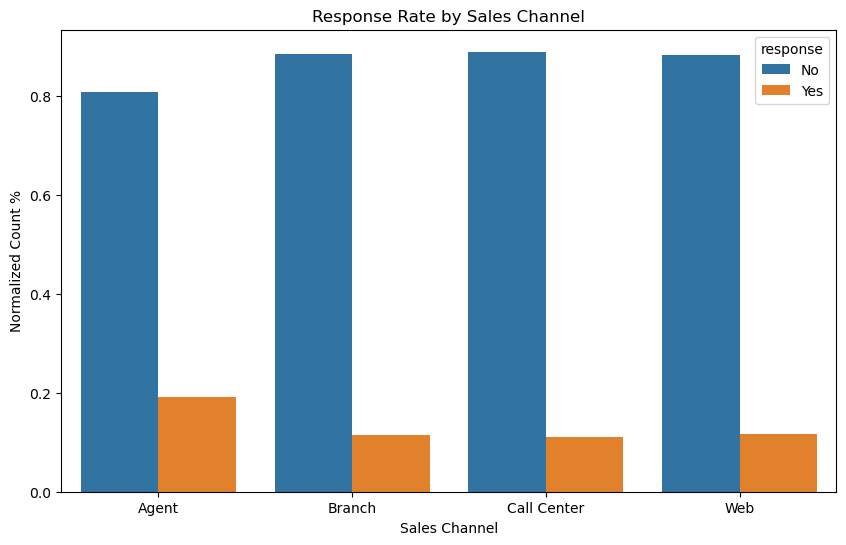

In [26]:
# Show a plot of the response rate by the sales channel.

plt.figure(figsize=(10, 6))
sns.barplot(x='sales_channel', y='proportion', hue='response', data=response_rate)
plt.title('Response Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Normalized Count %')
plt.show()

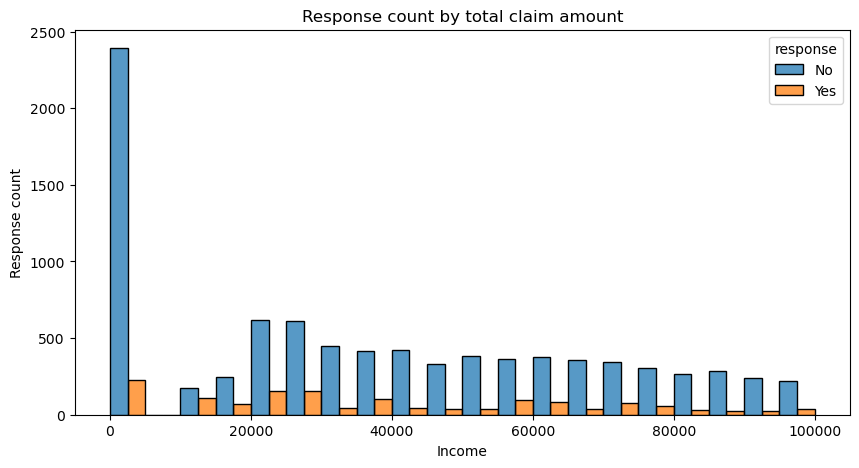

In [27]:
#Show a plot of the response rate by the total claim amount.

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(marketing_customer, x = "income", bins=20, hue = "response", ax=ax, multiple="dodge")
plt.title('Response count by total claim amount')
plt.xlabel('Income')
plt.ylabel('Response count')
plt.show()

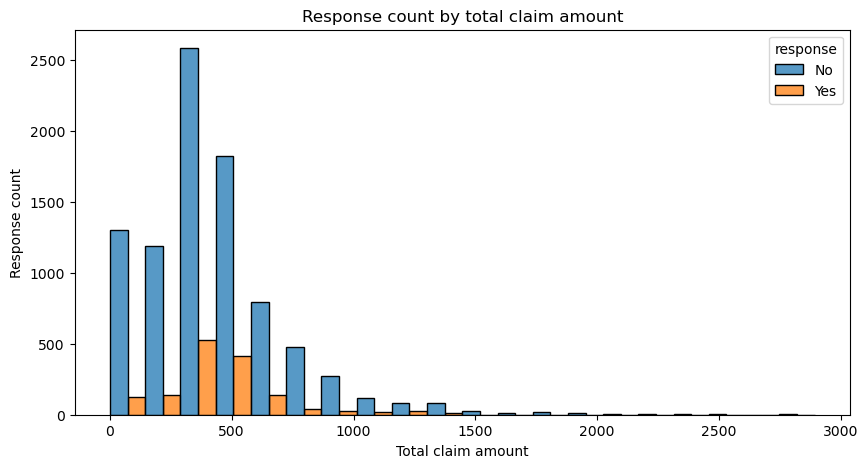

In [28]:
# Show a plot of the response rate by income.

fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(marketing_customer, x = "total_claim_amount", bins=20, hue = "response", ax=ax,multiple="dodge")
plt.title('Response count by total claim amount')
plt.xlabel('Total claim amount')
plt.ylabel('Response count')
plt.show()

# lab-data-transformations

In [54]:
#We check the df again before starting with the lab
display(marketing_customer.isna().sum())
display(marketing_customer.head())

customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
effective_to_date_month             0
dtype: int64

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1


In [30]:
#Check the data types of the columns. We see that all excep number_of_open_complaints make sense.
marketing_customer.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints                object
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [31]:
# We convert number_of_open_complaints into numeric to be able to work with a further numeric variable
marketing_customer['number_of_open_complaints'] = pd.to_numeric(marketing_customer['number_of_open_complaints'], errors='coerce')
marketing_customer.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [57]:
# We check the distribution of the values for the number_of_open_complaints claim
marketing_customer["number_of_open_complaints"].value_counts()

number_of_open_complaints
0.0    8160
1.0    1145
2.0     414
3.0     324
4.0     166
5.0      68
Name: count, dtype: int64

In [33]:
from scipy.stats import skew

In [58]:
# We get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
mc_number=marketing_customer.select_dtypes(include = np.number)
display(mc_number.head())
print("Number of columns for numerical values {}".format(mc_number.shape[1]))
display(mc_number.columns)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645,1


Number of columns for numerical values 9


Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'effective_to_date_month'],
      dtype='object')

In [35]:
mc_object = marketing_customer.select_dtypes(include = object)
mc_object.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN


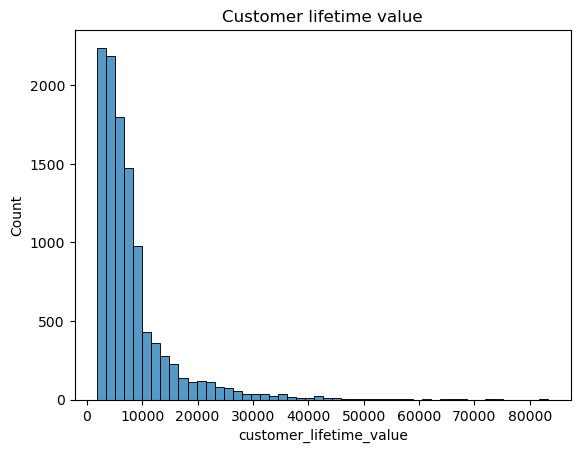

skewness for customer lifetime value is: 3.001


In [36]:
# We plot the distribution of the numerica values and analyze below each diagramm the skewness (see below each graph)
fig, ax = plt.subplots()
sns.histplot(data=mc_number, x="customer_lifetime_value", bins = 50, ax = ax)
ax.set_title("Customer lifetime value")
plt.show()
print("skewness for customer lifetime value is: {}".format(round(mc_number['customer_lifetime_value'].skew(),3)))

In [69]:
# The diagramm has a long tail to the right and the skewness is outside the -2:2 range. we have more record for low values than for higher values
# This will later be a problem when training the model.

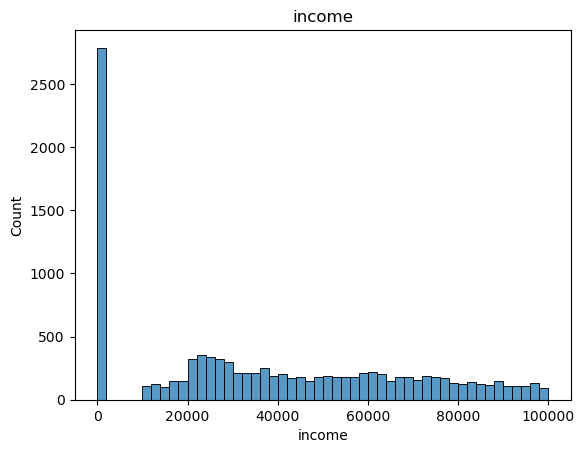

skewness for income is: 0.286


In [37]:
fig, ax = plt.subplots()
sns.histplot(data=mc_number, x="income", bins = 50, ax = ax)
ax.set_title("income")
plt.show()
print("skewness for income is: {}".format(round(mc_number['income'].skew(),3)))

In [ ]:
# The data is relavitely low skewed but we have many records with 0 income, which we have to decide how to deal later (too many to replace by mean or median?)

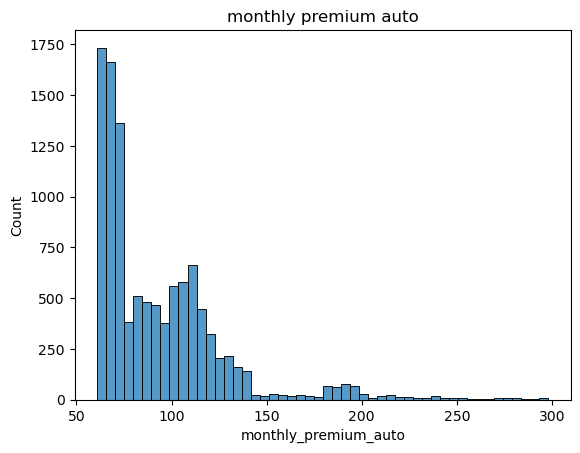

skewness for monthly premium_auto is: 2.117


In [38]:
fig, ax = plt.subplots()
sns.histplot(data=mc_number, x="monthly_premium_auto", bins = 50, ax = ax)
ax.set_title("monthly premium auto")
plt.show()
print("skewness for monthly premium_auto is: {}".format(round(mc_number['monthly_premium_auto'].skew(),3)))

In [ ]:
# The diagramm has a tail to the right and the skewness is slightly outside the -2:2 range. As it happened with customer_lifetime_value we have more record for low values than for higher values

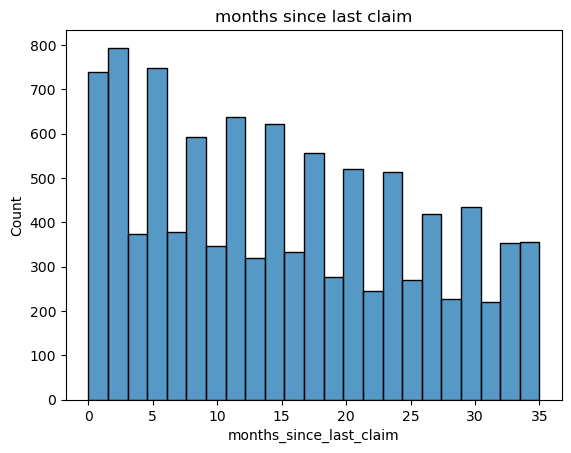

skewness for months since last claim is: 0.27


In [39]:
fig, ax = plt.subplots()
sns.histplot(data=mc_number, x="months_since_last_claim", ax = ax)
ax.set_title("months since last claim")
plt.show()
print("skewness for months since last claim is: {}".format(round(mc_number['months_since_last_claim'].skew(),3)))

In [ ]:
# Skewness is close to 0. It has a slight tail to the right, but seem to have a good number of records for each value on X

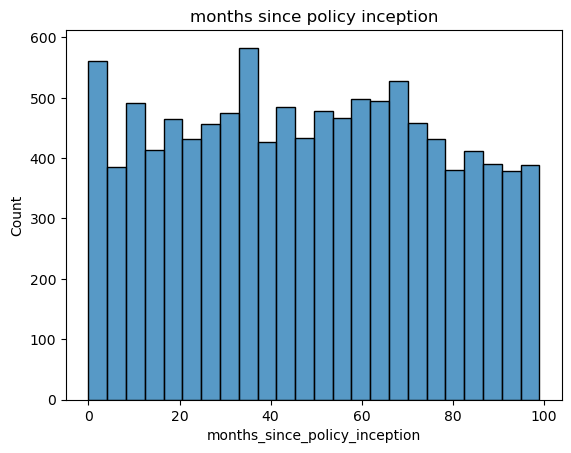

skewness for months since policy inception: 0.034


In [40]:
fig, ax = plt.subplots()
sns.histplot(data=mc_number, x="months_since_policy_inception", ax = ax)
ax.set_title("months since policy inception")
plt.show()
print("skewness for months since policy inception: {}".format(round(mc_number['months_since_policy_inception'].skew(),3)))

In [ ]:
# Same as column months_since_last_claim, the skewness is fairly low on this one here.

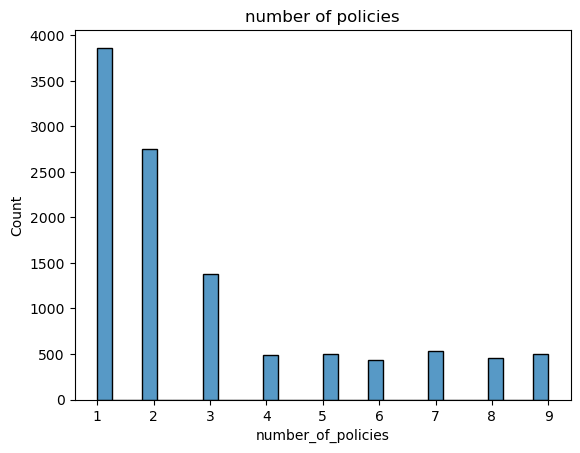

skewness for months since policy inception: 1.243


In [70]:
fig, ax = plt.subplots()
sns.histplot(data=mc_number, x="number_of_policies", ax = ax)
ax.set_title("number of policies")
plt.show()
print("skewness for months since policy inception: {}".format(round(mc_number['number_of_policies'].skew(),3)))

In [ ]:
# The diagramm has a tail to the right but the skewness is slightly inside the -2:2 range. We have more records for those cases with 1,2 and 3 policies

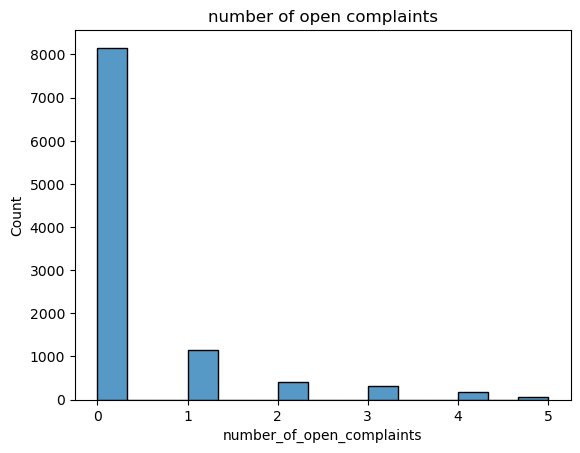

skewness for number of open complaints: 2.804


In [59]:
fig, ax = plt.subplots()
sns.histplot(data=mc_number, x="number_of_open_complaints", ax = ax)
ax.set_title("number of open complaints")
plt.show()
print("skewness for number of open complaints: {}".format(round(mc_number['number_of_open_complaints'].skew(),3)))

In [ ]:
# The diagramm has a tail to the right and the skewness is slightly outside the -2:2 range. As it happened with customer_lifetime_value we have more record for low values than for higher values

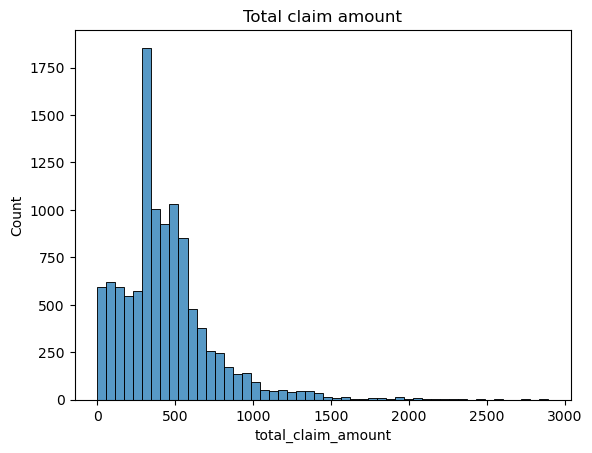

skewness for total claim amount: 1.729


In [42]:
fig, ax = plt.subplots()
sns.histplot(data=mc_number, x="total_claim_amount",bins = 50, ax = ax)
ax.set_title("Total claim amount")
plt.show()
print("skewness for total claim amount: {}".format(round(mc_number['total_claim_amount'].skew(),3)))

In [ ]:
# The column total_claim_amount is skewed to the right. Skewness is within the -2:2 range but we probably need to take it into consideration for high values

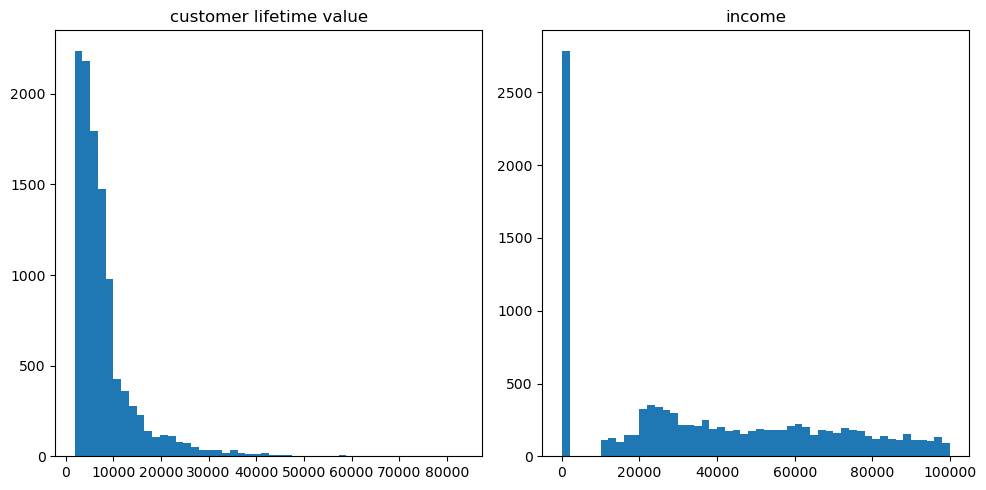

In [44]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(mc_number["customer_lifetime_value"], bins=50)
ax[0].set_title('customer lifetime value')

ax[1].hist(mc_number["income"], bins=50)
ax[1].set_title('income')
plt.tight_layout()
plt.show()

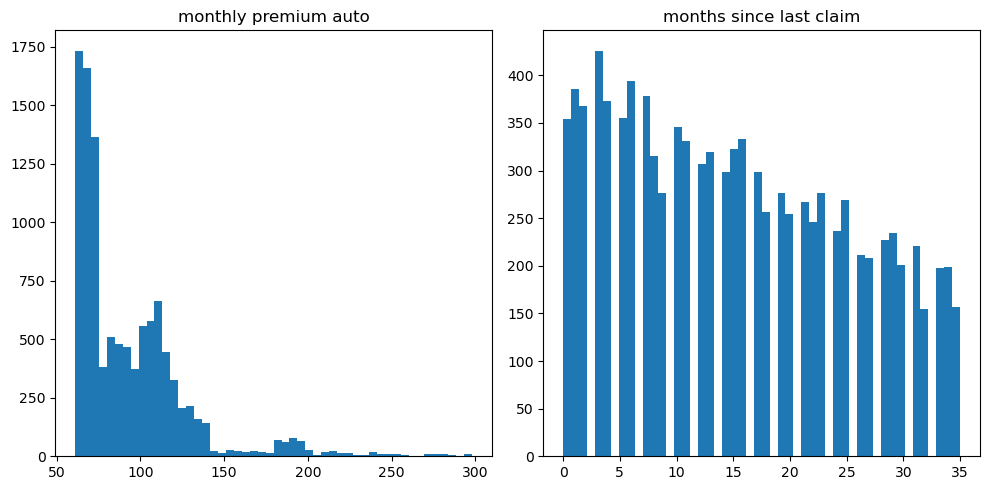

In [45]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(mc_number["monthly_premium_auto"], bins=50)
ax[0].set_title('monthly premium auto')

ax[1].hist(mc_number["months_since_last_claim"], bins=50)
ax[1].set_title('months since last claim')
plt.tight_layout()
plt.show()

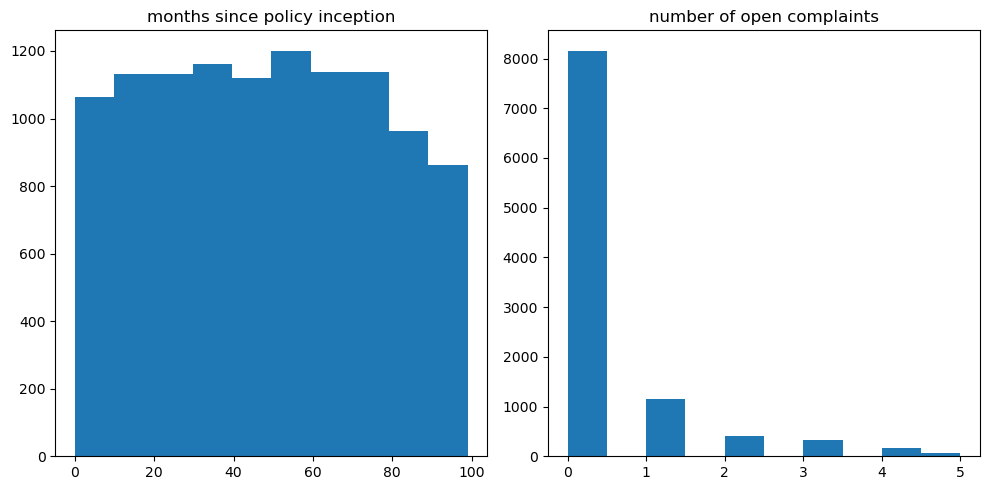

<Figure size 640x480 with 0 Axes>

In [63]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(mc_number["months_since_policy_inception"])
ax[0].set_title('months since policy inception')

ax[1].hist(mc_number["number_of_open_complaints"])
ax[1].set_title('number of open complaints')
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

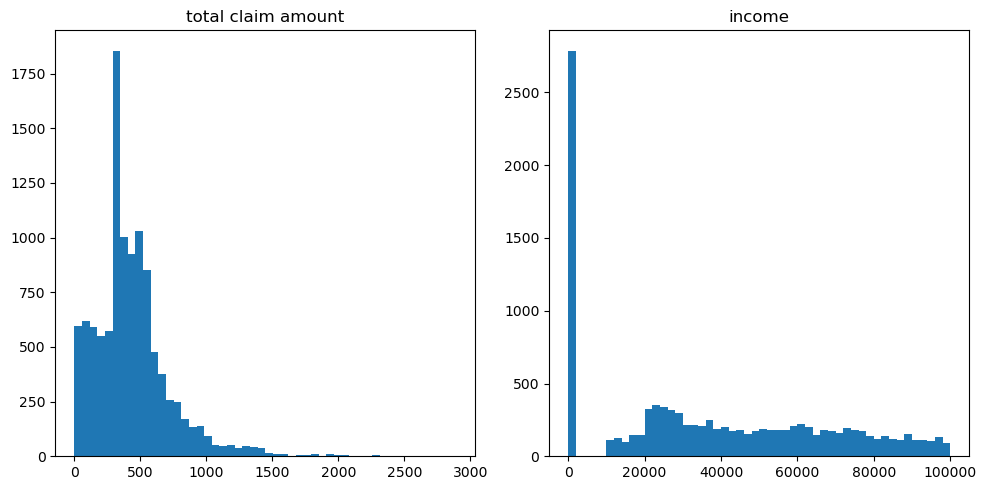

In [67]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist(mc_number["total_claim_amount"],bins=50)
ax[0].set_title('total claim amount')

ax[1].hist(mc_number["income"],bins=50)
ax[1].set_title('income')

plt.tight_layout()
plt.show()

In [50]:
display(mc_number.columns)
display(mc_number.isnull().sum())
display(mc_number.describe())

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'effective_to_date_month'],
      dtype='object')

customer_lifetime_value            0
income                             0
monthly_premium_auto               0
months_since_last_claim          633
months_since_policy_inception      0
number_of_open_complaints        633
number_of_policies                 0
total_claim_amount                 0
effective_to_date_month            0
dtype: int64

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_month
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [51]:
# We drop the effective_to_date_month, as it was a dummy column for the calculations above.
mc_number_corr= mc_number.drop("effective_to_date_month",axis=1)
mc_number_corr.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.028306,0.403069,0.016052,0.016960,-0.032243,0.016024,0.232626
income,0.028306,1.000000,-0.009788,-0.023814,-0.005903,0.007163,-0.009960,-0.354141
monthly_premium_auto,0.403069,-0.009788,1.000000,0.008744,0.018953,-0.010350,-0.020505,0.631799
months_since_last_claim,0.016052,-0.023814,0.008744,1.000000,-0.039318,0.002246,0.007678,0.013137
months_since_policy_inception,0.016960,-0.005903,0.018953,-0.039318,1.000000,0.004376,-0.009123,0.003095
number_of_open_complaints,-0.032243,0.007163,-0.010350,0.002246,0.004376,1.000000,0.004098,-0.011379
number_of_policies,0.016024,-0.009960,-0.020505,0.007678,-0.009123,0.004098,1.000000,-0.008923
total_claim_amount,0.232626,-0.354141,0.631799,0.013137,0.003095,-0.011379,-0.008923,1.000000


In [52]:
# We seem not to have any columns with high correlation among each other. The column with the highest correlation is with monthly premium auto
# I assume that customers paying the premium coverage are more like likely to report a claim and therefore increase the total claim amount.

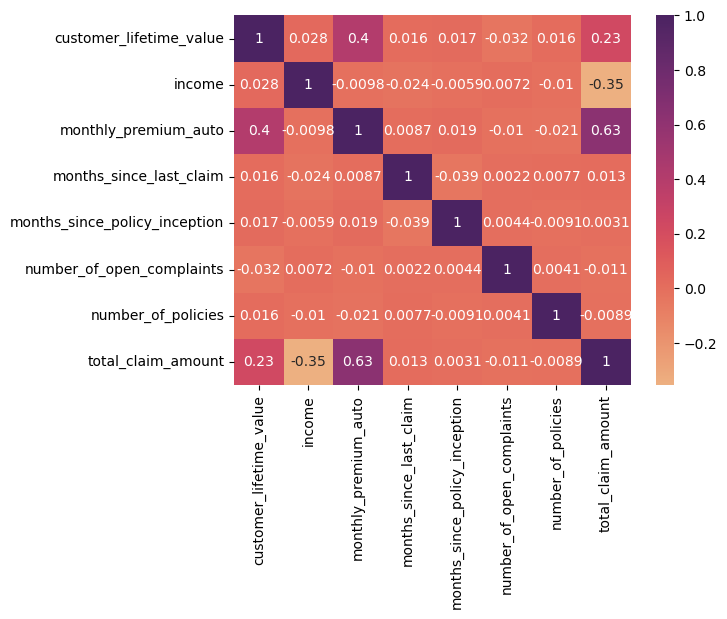

In [53]:
correlations_matrix = mc_number_corr.corr()
cmap = sns.color_palette("flare", as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()

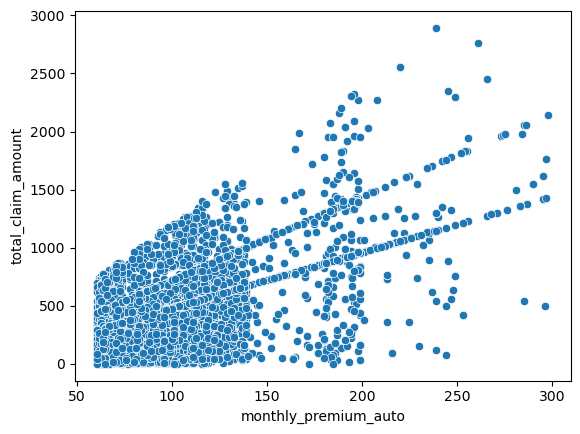

In [72]:
#We plot the values of monthly_premium_auto and total_claim_amount to get an overview:
sns.scatterplot(data=mc_number, x='monthly_premium_auto',y='total_claim_amount')
plt.show()

In [ ]:
# In order to see if the different ranges matter on the correlation I have decided to apply a scaler. I describe the data and plot it into a heatplot.
# It seems as if the different ranges did not have a direct impact on the correlation.

In [87]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaling standard scaler: make data distributed with mean=0 and std=1
transformer = StandardScaler()
transformer.fit(mc_number)
x_standardized = transformer.transform(mc_number)
#print(x_standardized.shape)
pd.DataFrame(x_standardized, columns=mc_number.columns).describe().T


,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,10910.0,-1.426296e-16,1.000046,-0.888953,-0.581543,-0.326386,0.141550,10.938228
income,10910.0,4.949702e-17,1.000046,-1.236462,-1.236462,-0.122630,0.814106,2.056958
monthly_premium_auto,10910.0,1.048555e-16,1.000046,-0.934819,-0.731573,-0.296045,0.458871,5.946524
months_since_last_claim,10277.0,6.360799e-17,1.000049,-1.502905,-0.907659,-0.113997,0.778873,1.969366
months_since_policy_inception,10910.0,1.107170e-16,1.000046,-1.721295,-0.862293,-0.003290,0.819920,1.822089
number_of_open_complaints,10277.0,5.807686e-17,1.000049,-0.421143,-0.421143,-0.421143,-0.421143,5.058833
number_of_policies,10910.0,5.731234e-17,1.000046,-0.824922,-0.824922,-0.408125,0.425469,2.509455
total_claim_amount,10910.0,3.061000e-17,1.000046,-1.488153,-0.560658,-0.179088,0.384409,8.414194
effective_to_date_month,10910.0,-9.573766e-17,1.000046,-0.935529,-0.935529,-0.935529,1.068914,1.068914


In [96]:
mc_number_standard = df = pd.DataFrame(x_standardized, columns=mc_number.columns)
mc_number_standard= mc_number_standard.drop("effective_to_date_month",axis=1)
mc_number_standard

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-0.466105,0.345635,-0.934819,-0.808451,0.139877,-0.421143,2.509455,-0.486325
1,-0.840946,-1.236462,-0.847713,-1.205282,-0.790709,-0.421143,-0.824922,1.061160
2,1.006523,-0.507194,0.197554,1.870158,-0.611750,-0.421143,-0.408125,0.154404
3,2.079112,0.380189,0.110448,-0.510828,-1.613919,-0.421143,-0.408125,0.168140
4,0.146240,-0.456597,0.691152,NaN,-0.611750,NaN,1.675860,0.934524
...,...,...,...,...,...,...,...,...
10905,1.095916,-1.236462,4.639940,NaN,-0.289625,NaN,1.675860,2.668033
10906,-0.400710,0.777715,-0.818678,-0.808451,0.712545,-0.421143,1.259063,-0.554030
10907,2.305825,0.075787,3.130109,-0.411620,0.533586,-0.421143,-0.408125,-0.183393
10908,0.574273,0.878150,1.881595,-1.502905,-0.754917,3.962838,1.259063,0.627725


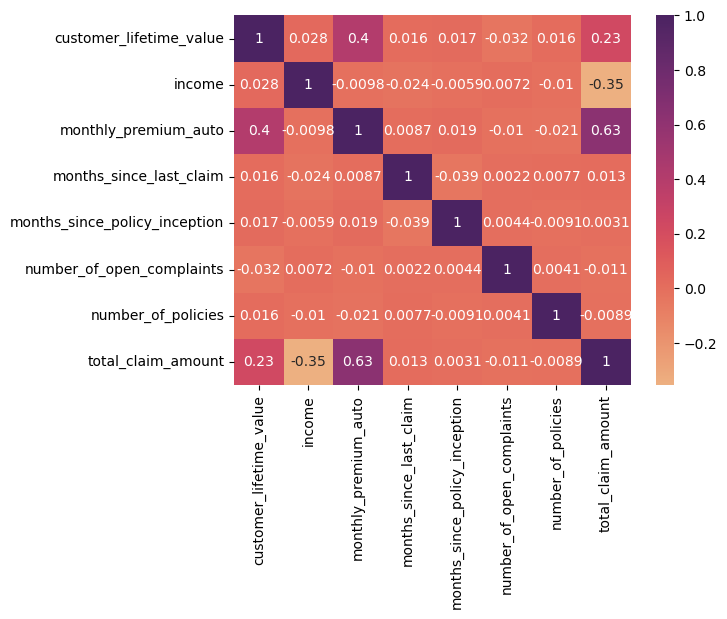

In [97]:
correlations_matrix_scale = mc_number_standard.corr()
cmap = sns.color_palette("flare", as_cmap=True)
sns.heatmap(correlations_matrix_scale, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()